# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

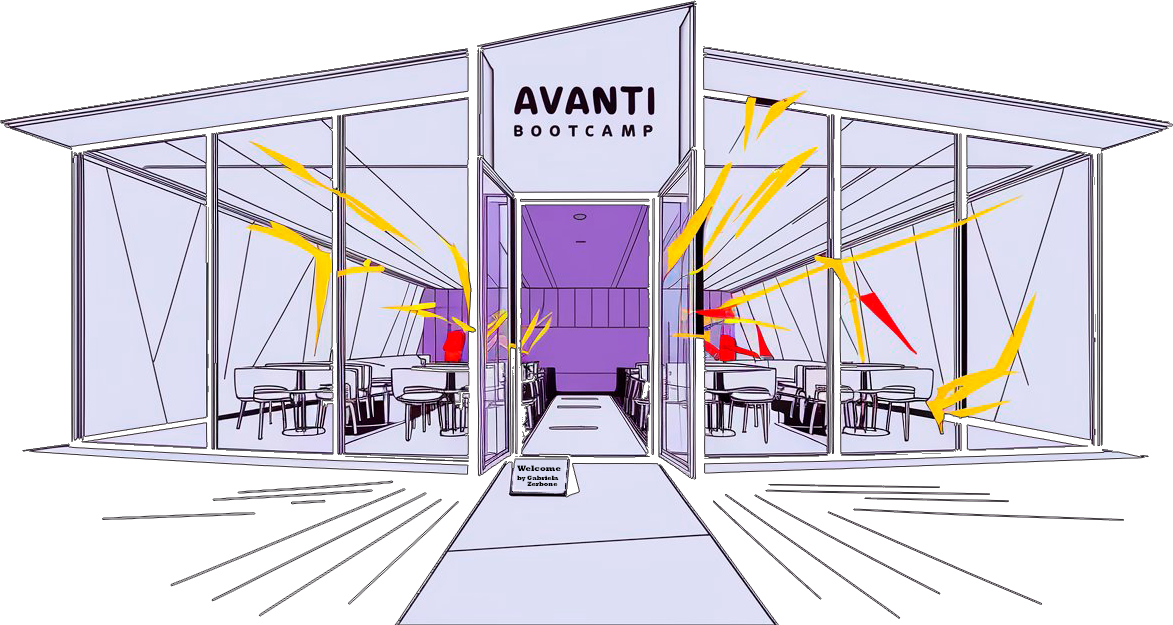

## 1. Descrição dos dados

### 1.1 - Descrição Conceitual do Dataset

O dataset é baseado em um registro de informações feito por um garçom sobre cada gorjeta que recebeu durante alguns meses trabalhando em um restaurante. Ele coletou diversas variáveis como `total_bill`, `tip`, `sex`, `smoker`, `day`, `time` e `size`


### 1.2 - Leitura do dicionário de dados

In [2]:
df_dict = pd.read_csv("../data/raw/dictionary_tips.csv")
df_dict

,variavel,descrição,tipo,subtipo
0,total_bill,conta total em dolares,quantitativa,continua
1,tip,gorjeta em dolares,quantitativa,continua
2,sex,gênero do pagante,qualitativa,nominal
3,smoker,existência de fumantes na mesa(sim ou não),qualitativa,nominal
4,day,dia da semana,qualitativa,nominal
5,time,momento da refeição,qualitativa,nominal
6,size,quantidade de pessoas por mesa,quantitativa,discreta


### 1.3 - Quantidade de instâncias e variáveis

In [3]:
df = pd.read_csv("../data/raw/data_tips.csv")
linhas, colunas = df.shape
print(f"O DataFrame possui {linhas} instâncias e {colunas} variáveis.")

O DataFrame possui 244 instâncias e 7 variáveis.


### 1.4 - Quantidade de tipos e subtipos

In [4]:
print("\nQuantidades de TIPO e SUBTIPOS:")
col_df_dict = df_dict[['tipo', 'subtipo']]
col_df_dict.value_counts()


Quantidades de TIPO e SUBTIPOS:


tipo          subtipo 
qualitativa   nominal     4
quantitativa  continua    2
              discreta    1
dtype: int64

### 1.5 - Quantidade de valores faltantes

In [5]:
print("\nNúmero de valores faltantes em cada coluna:")
print(df.isnull().sum())


Número de valores faltantes em cada coluna:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


- O dataset **NÃO** possui valores faltantes

## 2. Perguntas de partida e hipóteses

---
#### 1 - Existe relação entre gênero do pagante com a quantidade de gorjeta dada?  
#### 2 - Existe relação entre a variação gorjetas baseadas no gênero do cliente e o momento da refeição (almoço ou janta)?  
#### 3 - A existência de fumantes na mesa interfere na conta total?  
#### 4 - Como as gorjetas variam com base no tamanho do grupo?  
---

#### `1 - Existe relação entre gênero do pagante com a quantidade de gorjeta dada?`  
- Dessa forma saberemos qual gênero costuma dar mais gorjetas para os garçons nesse restaurante.  


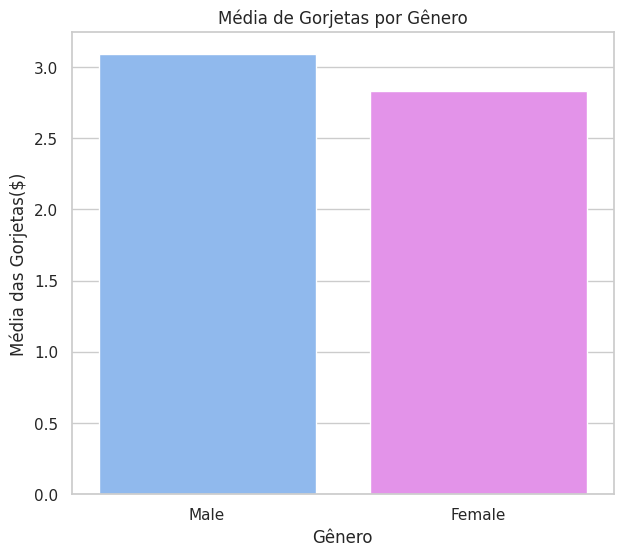

In [6]:
df_sex_tip = df.groupby('sex')['tip'].mean().reset_index().sort_values(by='tip', ascending=False)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7,6))
sns.barplot(x='sex', y='tip',
            data=df_sex_tip, ci=None,  
            palette=["#80b8fc","#ef85f7"])

plt.title('Média de Gorjetas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média das Gorjetas($)')

plt.show()

#### `2 - Existe relação entre a variação gorjetas baseadas no gênero do cliente e o momento da refeição (almoço ou janta)?`  
- Poderemos saber se há alguma relação relevante entre a variação das gorjetas apresentadas na pergunta 1 com o momento em que a refeição é realizada.

/home/gzerbone/avanti-bootcamp-cdd/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

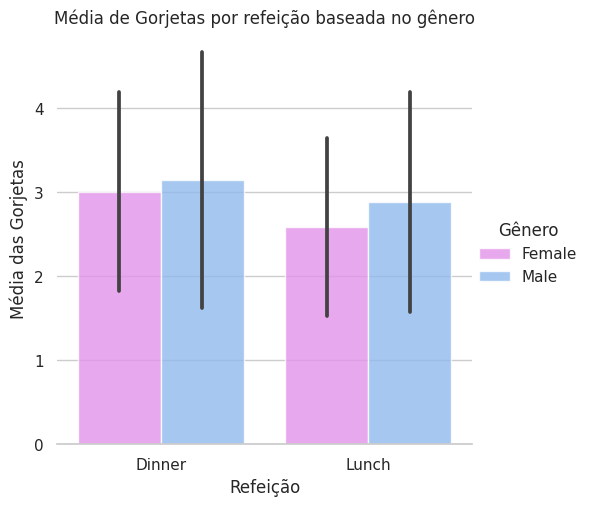

In [14]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

group_bars = sns.catplot(
    data=df, kind="bar",
    x="time",y="tip", hue="sex",
    ci="sd", palette=["#ef85f7", "#80b8fc"], alpha=.8, height=5
)
group_bars.despine(left=True)
group_bars.legend.set_title("Gênero")


plt.title('Média de Gorjetas por refeição baseada no gênero')
plt.xlabel('Refeição')
plt.ylabel('Média das Gorjetas')
plt.show()

#### `3 - A existência de fumantes na mesa interfere na conta total?`  
- A existência de fumantes na mesa não afeta o valor médio da conta, porém possui uma maior variabilidade nas contas de mesas com fumantes, indicando que as contas podem ser muito baixas ou muito altas com mais frequência do que nas mesas sem fumantes.

In [15]:
qtdd_smokers = df['smoker']
qtdd_smokers.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

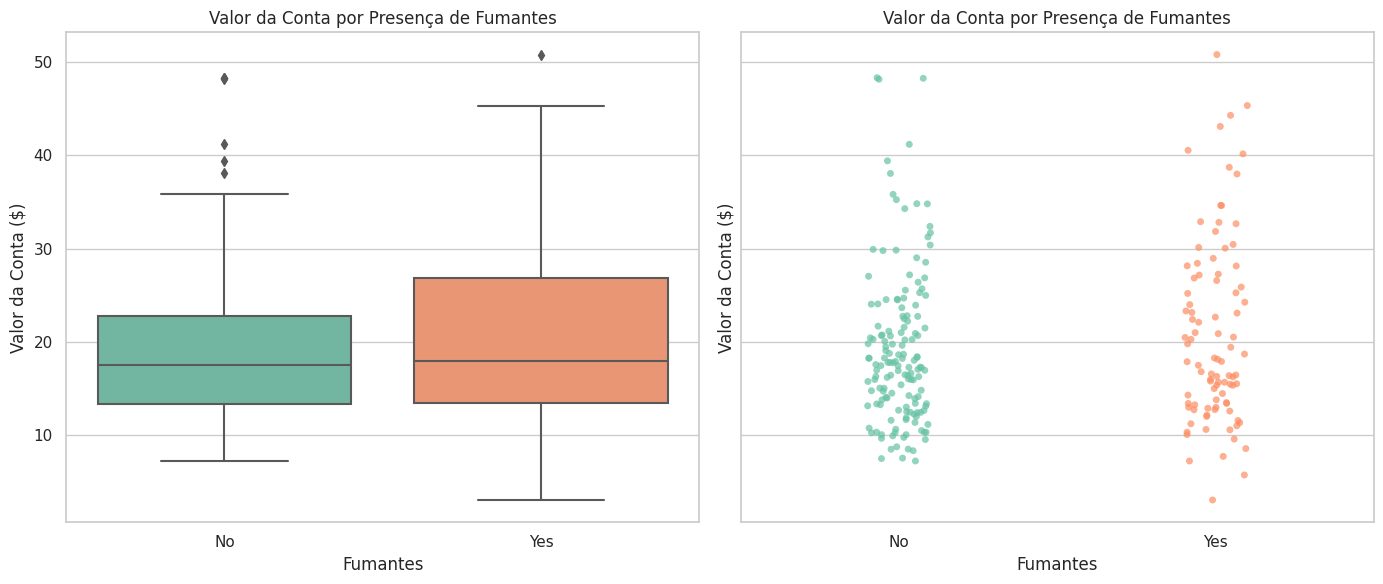

In [16]:
#Imagens comparatórias um do lado da outra
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(x='smoker', y='total_bill', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Valor da Conta por Presença de Fumantes')
axes[0].set_xlabel('Fumantes')
axes[0].set_ylabel('Valor da Conta ($)')

sns.stripplot(x='smoker', y='total_bill', data=df, jitter=True, palette='Set2', alpha=0.7, ax=axes[1])
axes[1].set_title('Valor da Conta por Presença de Fumantes')
axes[1].set_xlabel('Fumantes')
axes[1].set_ylabel('Valor da Conta ($)')

plt.tight_layout()
plt.show()


- A utilização de dois gráficos é importante para notarmos que enquanto o gráfico `Box plot` é interessante para compararmos a distribuição dos valores da conta entre as mesas com e sem fumantes, o gráfico `Strip Plot` nos mostra a distribuição dos valores da conta para cada grupo individualmente

#### `4 - Como as gorjetas variam com base no tamanho do grupo?`
- Grupos de 1 ou 2 pessoas geralmente dão gorjetas menores, enquanto grupos maiores têm uma maior variabilidade e tendem a incluir gorjetas mais altas.

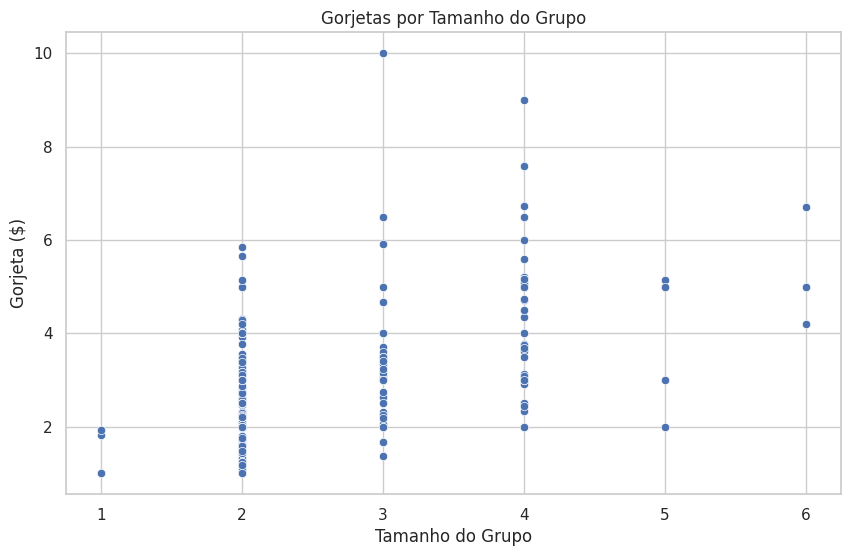

In [20]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='size', y='tip', data=df)

plt.title('Gorjetas por Tamanho do Grupo')
plt.xlabel('Tamanho do Grupo')
plt.ylabel('Gorjeta ($)')
plt.show()


## 3. Insights

- **Existe relação entre gênero do pagante com a quantidade de gorjeta dada?**
    - Os pagantes to sexo masculino tendem a dar mais gorjetas.
- **Existe relação entre a variação gorjetas baseadas no gênero do cliente e o momento da refeição (almoço ou janta)?**
    - A média de gorjetas masculinas permanece mais alta independete do momento da refeição, porém ao notarmos que os intervalos de confiança (desvio padrão das médias), também percebemos que talvez não haja necessidade do estabelecimento aplicar mais esforço de atendimento com pagantes masculinos, pois o desvio padrão ajuda a visualizar que as diferenças de valores pagos não são significativas o suficiente para justificar mudanças no atendimento. Tal ato poderia prejudicar financeiramente o local e também a sua imagem.
- **A existência de fumantes na mesa interfere na conta total?**
    - Embora a presença de fumantes não altere significativamente o valor médio das contas, ela introduz uma maior variabilidade nos valores das contas. Isso sugere que os funcionários devem estar preparados para lidar com uma maior variabilidade nos pedidos de mesas com fumantes, isso pode incluir treinamento para gerenciar situações em que as contas são muito baixas ou muito altas.
- **Como as gorjetas variam com base no tamanho do grupo?**
    - Como grupos maiores têm o potencial de dar gorjetas mais altas, os funcionários podem ser incentivados a prestar um excelente atendimento a esses grupos.
    - Promoções que incentivem a formação de grupos maiores podem ser benéficas para aumentar o valor das gorjetas.